# DSCI 441 Milestone 1
## By: Eddie McGowan

### Background/Proposal
For my project, I’m developing a classification model to predict the type of diabetes or prediabetic condition a person may have, based on a combination of genetic markers and environmental factors. I’ll be using a dataset from Kaggle, which includes a target column and 33 feature columns.

To build this model, I will test several machine learning algorithms, including:

Decision Tree

Logistic Regression

K-Nearest Neighbors (KNN)

Linear Discriminant Analysis (LDA)

Random Forest

XGBoost

Support Vector Machine (SVM)

Multilayer Perceptron

Using these methods, I aim to create an accurate model to predict the condition a person is likely to have based on their unique features.

Link:

The dataset I chose has 34 columns and 70,000 rows. The columns are as follows: 
| Column Name                      | Description                                                                 |
|----------------------------------|-----------------------------------------------------------------------------|
| **Target**                       | The type of diabetes or prediabetic condition diagnosed in the patient |
| **Genetic Markers**               | Indicates whether specific genetic markers associated with diabetes are present ("Positive" or "Negative"). |
| **Autoantibodies**                | Presence of autoantibodies associated with autoimmune diabetes ("Positive" or "Negative"). |
| **Family History**                | Indicates whether the patient has a family history of diabetes ("True" or "False"). |
| **Environmental Factors**         | Notes environmental influences that may contribute to diabetes ("Present" or "Absent"). |
| **Insulin Levels**                | Insulin levels in the patient’s blood (µU/mL).|
| **Age**                           | Age of the patient at the time of data collection (years).|
| **BMI**                           | Body Mass Index of the patient. |
| **Physical Activity**             | The patient’s level of physical activity ("High", "Moderate", "Low"). |
| **Dietary Habits**                | The patient’s eating habits ("Healthy" or "Unhealthy"). |
| **Blood Pressure**                | Blood pressure levels (mmHg).|
| **Cholesterol Levels**            | Cholesterol levels (mg/dL).|
| **Waist Circumference**           | Waist circumference measurement (cm).|
| **Blood Glucose Levels**          | Blood glucose levels (mg/dL).|
| **Ethnicity**                     | Classification of diabetes risk based on ethnicity ("Low Risk" or "High Risk"). |
| **Socioeconomic Factors**         | Socioeconomic status classification ("Medium", "High", "Low"). |
| **Smoking Status**                | Whether the patient is a smoker ("Smoker" or "Non-Smoker"). |
| **Alcohol Consumption**           | Alcohol consumption levels ("Low", "Moderate", "High"). |
| **Glucose Tolerance Test**        | Result of glucose tolerance test ("Normal" or "Abnormal"). |
| **History of PCOS**               | Whether the patient has a history of Polycystic Ovary Syndrome (PCOS) ("True" or "False"). |
| **Previous Gestational Diabetes** | Whether the patient had gestational diabetes ("True" or "False"). |
| **Pregnancy History**             | Pregnancy outcome classification ("Normal" or "Complications"). |
| **Weight Gain During Pregnancy**  | Weight gained during pregnancy (kg).|
| **Pancreatic Health**             | Pancreatic function assessment. |
| **Pulmonary Function**            | Pulmonary function test results.|
| **Cystic Fibrosis Diagnosis**     | Whether the patient has cystic fibrosis ("True" or "False"). |
| **Steroid Use History**           | Whether the patient has a history of steroid use ("True" or "False"). |
| **Genetic Testing**               | Results of genetic testing ("Positive" or "Negative"). |
| **Neurological Assessments**      | Neurological test results. |
| **Liver Function Tests**          | Results of liver function tests ("Normal" or "Abnormal"). |
| **Digestive Enzyme Levels**       | Levels of digestive enzymes in the body.|
| **Urine Test**                    | Urine test results ("Protein Present", "Normal", "Other"). |
| **Birth Weight**                  | The birth weight of the patient (grams). |
| **Early Onset Symptoms**          | Whether the patient exhibited early onset symptoms of diabetes ("True" or "False"). |


### EDA Steps

#### 1. Data Wrangling
    Load dataset and remove unnecessary attributes
    Remove duplicates
    Analyze schema and change data types
#### 2. Summary Statistics for Numerical Attributes
    Remove outliers from dataset
#### 3. Summary Statistics for Non-numeric Attributes
#### 4. One Hot Encode Non-numeric Attributes
#### 5. Comparing Attributes Against Price
    Plot attributes against price
    Compare attributes vs. price
    Find the attributes most correlated with price

## 1. Data Wrangling
###  Load dataset and remove unnecessary attributes

I loaded the file into a pandas dataframe and printed example rows.

In [3]:
import pandas as pd
diabetes_raw = pd.read_csv('diabetes_dataset.csv')
#Print the number of records: 70,000
print("rows:",len(diabetes_raw))
#Print example records
print(diabetes_raw.head())

rows: 70000
                             Target Genetic Markers Autoantibodies  \
0          Steroid-Induced Diabetes        Positive       Negative   
1  Neonatal Diabetes Mellitus (NDM)        Positive       Negative   
2                       Prediabetic        Positive       Positive   
3                   Type 1 Diabetes        Negative       Positive   
4                  Wolfram Syndrome        Negative       Negative   

  Family History Environmental Factors  Insulin Levels  Age  BMI  \
0             No               Present              40   44   38   
1             No               Present              13    1   17   
2            Yes               Present              27   36   24   
3             No               Present               8    7   16   
4            Yes               Present              17   10   17   

  Physical Activity Dietary Habits  ...  Pulmonary Function  \
0              High        Healthy  ...                  76   
1              High        Healt

### Remove Duplicates
Check for duplicated rows in the dataset. Remove one copy of any duplicated rows found. 

In [4]:
duplicated_rows = diabetes_raw[diabetes_raw.duplicated()]
print(duplicated_rows)
# no duplicated records were found

Empty DataFrame
Columns: [Target, Genetic Markers, Autoantibodies, Family History, Environmental Factors, Insulin Levels, Age, BMI, Physical Activity, Dietary Habits, Blood Pressure, Cholesterol Levels, Waist Circumference, Blood Glucose Levels, Ethnicity, Socioeconomic Factors, Smoking Status, Alcohol Consumption, Glucose Tolerance Test, History of PCOS, Previous Gestational Diabetes, Pregnancy History, Weight Gain During Pregnancy, Pancreatic Health, Pulmonary Function, Cystic Fibrosis Diagnosis, Steroid Use History, Genetic Testing, Neurological Assessments, Liver Function Tests, Digestive Enzyme Levels, Urine Test, Birth Weight, Early Onset Symptoms]
Index: []

[0 rows x 34 columns]


### Analyze schema and change data types
Print the schema of the dataframe.

In [5]:
#diabetes_raw.info()
diabetes_raw.select_dtypes(include=['object']).info()
diabetes = diabetes_raw

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Target                         70000 non-null  object
 1   Genetic Markers                70000 non-null  object
 2   Autoantibodies                 70000 non-null  object
 3   Family History                 70000 non-null  object
 4   Environmental Factors          70000 non-null  object
 5   Physical Activity              70000 non-null  object
 6   Dietary Habits                 70000 non-null  object
 7   Ethnicity                      70000 non-null  object
 8   Socioeconomic Factors          70000 non-null  object
 9   Smoking Status                 70000 non-null  object
 10  Alcohol Consumption            70000 non-null  object
 11  Glucose Tolerance Test         70000 non-null  object
 12  History of PCOS                70000 non-null  object
 13  P

There are no null values in the dataset.

Boolean and categorical columns were incorrectly categorized as objects. In next cell these columns were converted to their proper data type.

In [6]:
categorical_columns = ["Target", "Genetic Markers", "Autoantibodies", 
    "Environmental Factors", "Physical Activity", "Dietary Habits",
    "Ethnicity", "Socioeconomic Factors", "Smoking Status",
    "Alcohol Consumption", "Glucose Tolerance Test", "Pregnancy History", "Genetic Testing","Liver Function Tests",
    "Urine Test"]
diabetes[categorical_columns] = diabetes_raw[categorical_columns].astype("category")
# Resource for mapping true and false values to boolean
# https://stackoverflow.com/questions/45196626/how-to-map-true-and-false-to-yes-and-no-in-a-pandas-data-frame-for-columns-o

diabetes["Family History"] = diabetes_raw["Family History"].map({"Yes": True, "No": False})

diabetes["History of PCOS"] = diabetes_raw["History of PCOS"].map({"Yes": True, "No": False})
diabetes["Previous Gestational Diabetes"] = diabetes_raw["Previous Gestational Diabetes"].map({"Yes": True, "No": False})
diabetes["Cystic Fibrosis Diagnosis"] = diabetes_raw["Cystic Fibrosis Diagnosis"].map({"Yes": True, "No": False})
diabetes["Steroid Use History"] = diabetes_raw["Steroid Use History"].map({"Yes": True, "No": False})
diabetes["Early Onset Symptoms"] = diabetes_raw["Early Onset Symptoms"].map({"Yes": True, "No": False})
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Target                         70000 non-null  category
 1   Genetic Markers                70000 non-null  category
 2   Autoantibodies                 70000 non-null  category
 3   Family History                 70000 non-null  bool    
 4   Environmental Factors          70000 non-null  category
 5   Insulin Levels                 70000 non-null  int64   
 6   Age                            70000 non-null  int64   
 7   BMI                            70000 non-null  int64   
 8   Physical Activity              70000 non-null  category
 9   Dietary Habits                 70000 non-null  category
 10  Blood Pressure                 70000 non-null  int64   
 11  Cholesterol Levels             70000 non-null  int64   
 12  Waist Circumference            7

## 2. Summary statistics: Numeric Attributes
Describe the high level statistics for each of the numeric columns.

In [7]:
diabetes.describe()

,Insulin Levels,Age,BMI,Blood Pressure,Cholesterol Levels,Waist Circumference,Blood Glucose Levels,Weight Gain During Pregnancy,Pancreatic Health,Pulmonary Function,Neurological Assessments,Digestive Enzyme Levels,Birth Weight
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,21.607443,32.020700,24.782943,111.339543,194.867200,35.051657,160.701657,15.496414,47.564243,70.264671,1.804157,46.420529,3097.061071
std,10.785852,21.043173,6.014236,19.945000,44.532466,6.803461,48.165547,9.633096,19.984683,11.965600,0.680154,19.391089,713.837300
min,5.000000,0.000000,12.000000,60.000000,100.000000,20.000000,80.000000,0.000000,10.000000,30.000000,1.000000,10.000000,1500.000000
25%,13.000000,14.000000,20.000000,99.000000,163.000000,30.000000,121.000000,7.000000,32.000000,63.000000,1.000000,31.000000,2629.000000
50%,19.000000,31.000000,25.000000,113.000000,191.000000,34.000000,152.000000,16.000000,46.000000,72.000000,2.000000,48.000000,3103.000000
75%,28.000000,49.000000,29.000000,125.000000,225.000000,39.000000,194.000000,22.000000,64.000000,79.000000,2.000000,61.000000,3656.250000
max,49.000000,79.000000,39.000000,149.000000,299.000000,54.000000,299.000000,39.000000,99.000000,89.000000,3.000000,99.000000,4499.000000


## 4. Summary statistics: Non-Numeric Attributes
I will now describe the high level statistics for each of the non-numeric columns

In [8]:
diabetes.describe(include='category').transpose()

,count,unique,top,freq
Target,70000,13,MODY,5553
Genetic Markers,70000,2,Positive,35101
Autoantibodies,70000,2,Negative,35058
Environmental Factors,70000,2,Absent,35088
Physical Activity,70000,3,Moderate,23427
Dietary Habits,70000,2,Healthy,35020
Ethnicity,70000,2,Low Risk,35018
Socioeconomic Factors,70000,3,Medium,23413
Smoking Status,70000,2,Smoker,35045
Alcohol Consumption,70000,3,Low,23411


In [9]:
#Print the unique values for each column in a pandas dataframe
#Resource https://stackoverflow.com/questions/27241253/print-the-unique-values-in-every-column-in-a-pandas-dataframe
for col in categorical_columns:
    print(f"Unique values for {col}:")
    print(",".join(map(str, diabetes[col].unique())))
    print("-" * 50)

Unique values for Target:
Steroid-Induced Diabetes,Neonatal Diabetes Mellitus (NDM),Prediabetic,Type 1 Diabetes,Wolfram Syndrome,LADA,Type 2 Diabetes,Wolcott-Rallison Syndrome,Secondary Diabetes,Type 3c Diabetes (Pancreatogenic Diabetes),Gestational Diabetes,Cystic Fibrosis-Related Diabetes (CFRD),MODY
--------------------------------------------------
Unique values for Genetic Markers:
Positive,Negative
--------------------------------------------------
Unique values for Autoantibodies:
Negative,Positive
--------------------------------------------------
Unique values for Environmental Factors:
Present,Absent
--------------------------------------------------
Unique values for Physical Activity:
High,Low,Moderate
--------------------------------------------------
Unique values for Dietary Habits:
Healthy,Unhealthy
--------------------------------------------------
Unique values for Ethnicity:
Low Risk,High Risk
--------------------------------------------------
Unique values for Socio

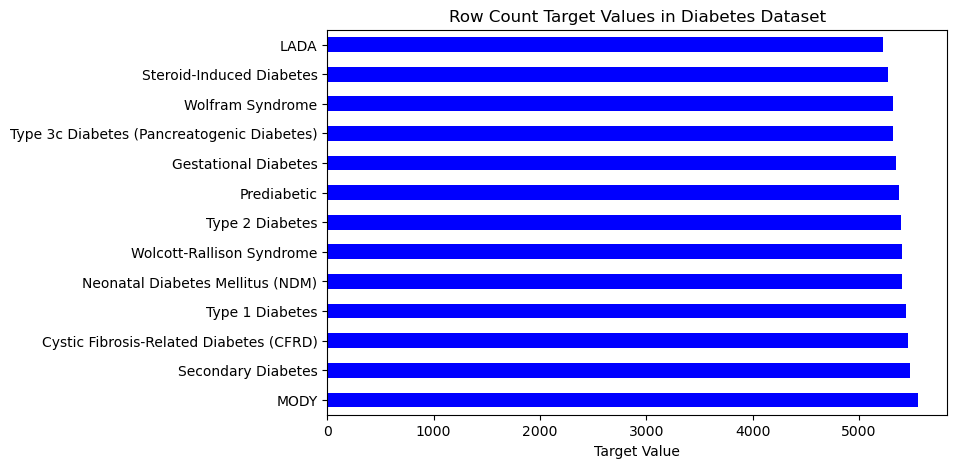

In [10]:
import matplotlib.pyplot as plt
#Creating a row count bar chart
#Reference https://stackoverflow.com/questions/48939795/how-to-plot-a-count-bar-chart-grouping-by-one-categorical-column-and-coloring-by
counts = diabetes['Target'].value_counts()

# Create the bar chart
plt.figure(figsize=(8, 5))
counts.plot(kind='barh', color='blue')

# Labels and title
plt.xlabel('Target Value')
plt.title('Row Count Target Values in Diabetes Dataset')

# Show the plot
plt.show()

In [11]:
diabetes["Genetic Markers Positive"] = (
    diabetes_raw["Genetic Markers"]
    .map({"Positive": True, "Negative": False})
    .fillna(False).astype(bool)
)
diabetes.drop(columns=["Genetic Markers"], inplace=True)

diabetes["Autoantibodies Positive"] = (
    diabetes_raw["Autoantibodies"].map({"Positive": True, "Negative": False}).fillna(False).astype(bool)
)
diabetes.drop(columns=["Autoantibodies"], inplace=True)

diabetes["Environmental Factors Present"] = (
    diabetes_raw["Environmental Factors"].map({"Present": True, "Absent": False}).fillna(False).astype(bool)
)
diabetes.drop(columns=["Environmental Factors"], inplace=True)

diabetes["Dietary Habits Unhealthy"] = (
    diabetes_raw["Dietary Habits"].map({"Unhealthy": True, "Healthy": False}).fillna(False).astype(bool)
)
diabetes.drop(columns=["Dietary Habits"], inplace=True)

diabetes["Smoking Status Smoker"] = (
    diabetes_raw["Smoking Status"]
    .map({"Smoker": True, "Non-Smoker": False})
    .fillna(False).astype(bool)
)
diabetes.drop(columns=["Smoking Status"], inplace=True)

diabetes["Glucose Tolerance Test Abnormal"] = (
    diabetes_raw["Glucose Tolerance Test"].map({"Abnormal": True, "Normal": False}).fillna(False).astype(bool)
)
diabetes.drop(columns=["Glucose Tolerance Test"], inplace=True)

diabetes["Pregnancy History Complications"] = (
    diabetes_raw["Pregnancy History"].map({"Complications": True, "Normal": False}).fillna(False).astype(bool)
)
diabetes.drop(columns=["Pregnancy History"], inplace=True)

diabetes["Genetic Testing Positive"] = (
    diabetes_raw["Genetic Testing"].map({"Positive": True, "Negative": False}).fillna(False).astype(bool)
)
diabetes.drop(columns=["Genetic Testing"], inplace=True)

diabetes["Liver Function Tests Abnormal"] = (
    diabetes_raw["Liver Function Tests"].map({"Abnormal": True, "Normal": False}).fillna(False).astype(bool)
)
diabetes.drop(columns=["Liver Function Tests"], inplace=True)

diabetes["Ethnicity High Risk"] = (
    diabetes_raw["Ethnicity"].map({"High Risk": True, "Low Risk": False}).fillna(False).astype(bool)
)
diabetes.drop(columns=["Ethnicity"], inplace=True)

print(diabetes.dtypes)


Target                             category
Family History                         bool
Insulin Levels                        int64
Age                                   int64
BMI                                   int64
Physical Activity                  category
Blood Pressure                        int64
Cholesterol Levels                    int64
Waist Circumference                   int64
Blood Glucose Levels                  int64
Socioeconomic Factors              category
Alcohol Consumption                category
History of PCOS                        bool
Previous Gestational Diabetes          bool
Weight Gain During Pregnancy          int64
Pancreatic Health                     int64
Pulmonary Function                    int64
Cystic Fibrosis Diagnosis              bool
Steroid Use History                    bool
Neurological Assessments              int64
Digestive Enzyme Levels               int64
Urine Test                         category
Birth Weight                    

## 4. One Hot Encoding Categorical Attributes

In [12]:
categorical_columns = ["Physical Activity", "Socioeconomic Factors", 
                       "Alcohol Consumption", "Urine Test"
]

# Perform one-hot encoding while dropping the first category to avoid multicollinearity
#Resource: https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
diabetes_encoded = pd.get_dummies(diabetes, columns=categorical_columns)

# Display the first few rows of the encoded dataset
print(diabetes_encoded.head())

print(f"Number of features: {diabetes_encoded.shape[1]}")
diabetes_encoded.columns.tolist()

                             Target  Family History  Insulin Levels  Age  BMI  \
0          Steroid-Induced Diabetes           False              40   44   38   
1  Neonatal Diabetes Mellitus (NDM)           False              13    1   17   
2                       Prediabetic            True              27   36   24   
3                   Type 1 Diabetes           False               8    7   16   
4                  Wolfram Syndrome            True              17   10   17   

   Blood Pressure  Cholesterol Levels  Waist Circumference  \
0             124                 201                   50   
1              73                 121                   24   
2             121                 185                   36   
3             100                 151                   29   
4             103                 146                   33   

   Blood Glucose Levels  History of PCOS  ...  Socioeconomic Factors_High  \
0                   168            False  ...                  

['Target',
 'Family History',
 'Insulin Levels',
 'Age',
 'BMI',
 'Blood Pressure',
 'Cholesterol Levels',
 'Waist Circumference',
 'Blood Glucose Levels',
 'History of PCOS',
 'Previous Gestational Diabetes',
 'Weight Gain During Pregnancy',
 'Pancreatic Health',
 'Pulmonary Function',
 'Cystic Fibrosis Diagnosis',
 'Steroid Use History',
 'Neurological Assessments',
 'Digestive Enzyme Levels',
 'Birth Weight',
 'Early Onset Symptoms',
 'Genetic Markers Positive',
 'Autoantibodies Positive',
 'Environmental Factors Present',
 'Dietary Habits Unhealthy',
 'Smoking Status Smoker',
 'Glucose Tolerance Test Abnormal',
 'Pregnancy History Complications',
 'Genetic Testing Positive',
 'Liver Function Tests Abnormal',
 'Ethnicity High Risk',
 'Physical Activity_High',
 'Physical Activity_Low',
 'Physical Activity_Moderate',
 'Socioeconomic Factors_High',
 'Socioeconomic Factors_Low',
 'Socioeconomic Factors_Medium',
 'Alcohol Consumption_High',
 'Alcohol Consumption_Low',
 'Alcohol Consumpti

## 5. Correlation Matrix


/tmp/ipykernel_2676120/50956570.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = diabetes_encoded.corr().abs()


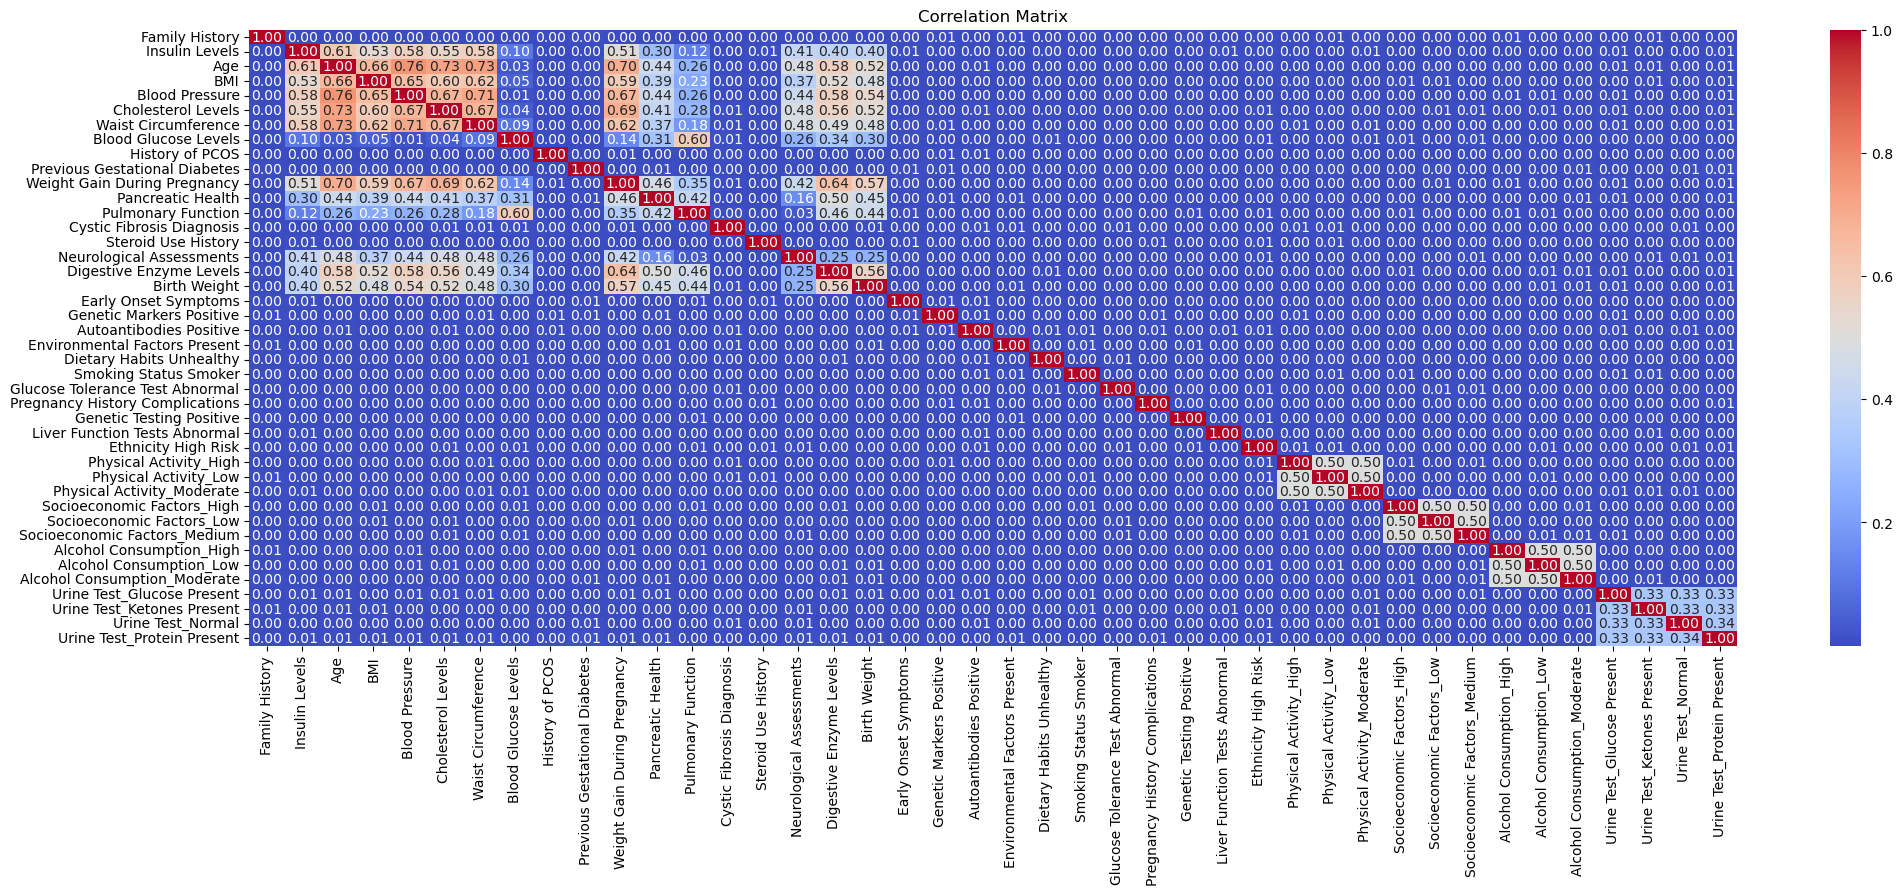

In [14]:
# Resource https://www.geeksforgeeks.org/create-a-correlation-matrix-using-python/ 
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = diabetes_encoded.corr().abs()

# Visualize with a heatmap
plt.figure(figsize=(24, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### 6. Statistical Model

### **Hypothesis Testing:**
- **Question:** Does high BMI (≥30) correlate with a higher likelihood of Type 2 Diabetes?
- **Test:** **Chi-Square Test**
- **Results:** Rejected null hypothesis → High BMI patients are more likely to have Type 2 Diabetes.


In [15]:

# Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html
import scipy.stats as stats

diabetes_stats = diabetes_encoded
bmi = 'BMI' 
diabetes_target = 'Target' 

# Create a new column for obesity classification
diabetes_stats['Obese'] = diabetes_stats[bmi] >= 30

# Create a contingency table
contingency_table = pd.crosstab(diabetes_stats['Obese'], diabetes_stats[diabetes_target] == 'Type 2 Diabetes')

# Perform chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Output results
print("Contingency Table:")
print(contingency_table)
print(f"p-value:", p)

# Interpretation
alpha = 0.05  # Significance level
if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


Contingency Table:
Target  False  True 
Obese               
False   52034   1746
True    12569   3651
p-value: 0.0
Reject the null hypothesis


### **Feature Distributions:**
- KDE plots were generated for all numerical features to analyze distributions.
- Identified some skewed distributions and bimodal distributions (e.g., "Weight Gain During Pregnancy").

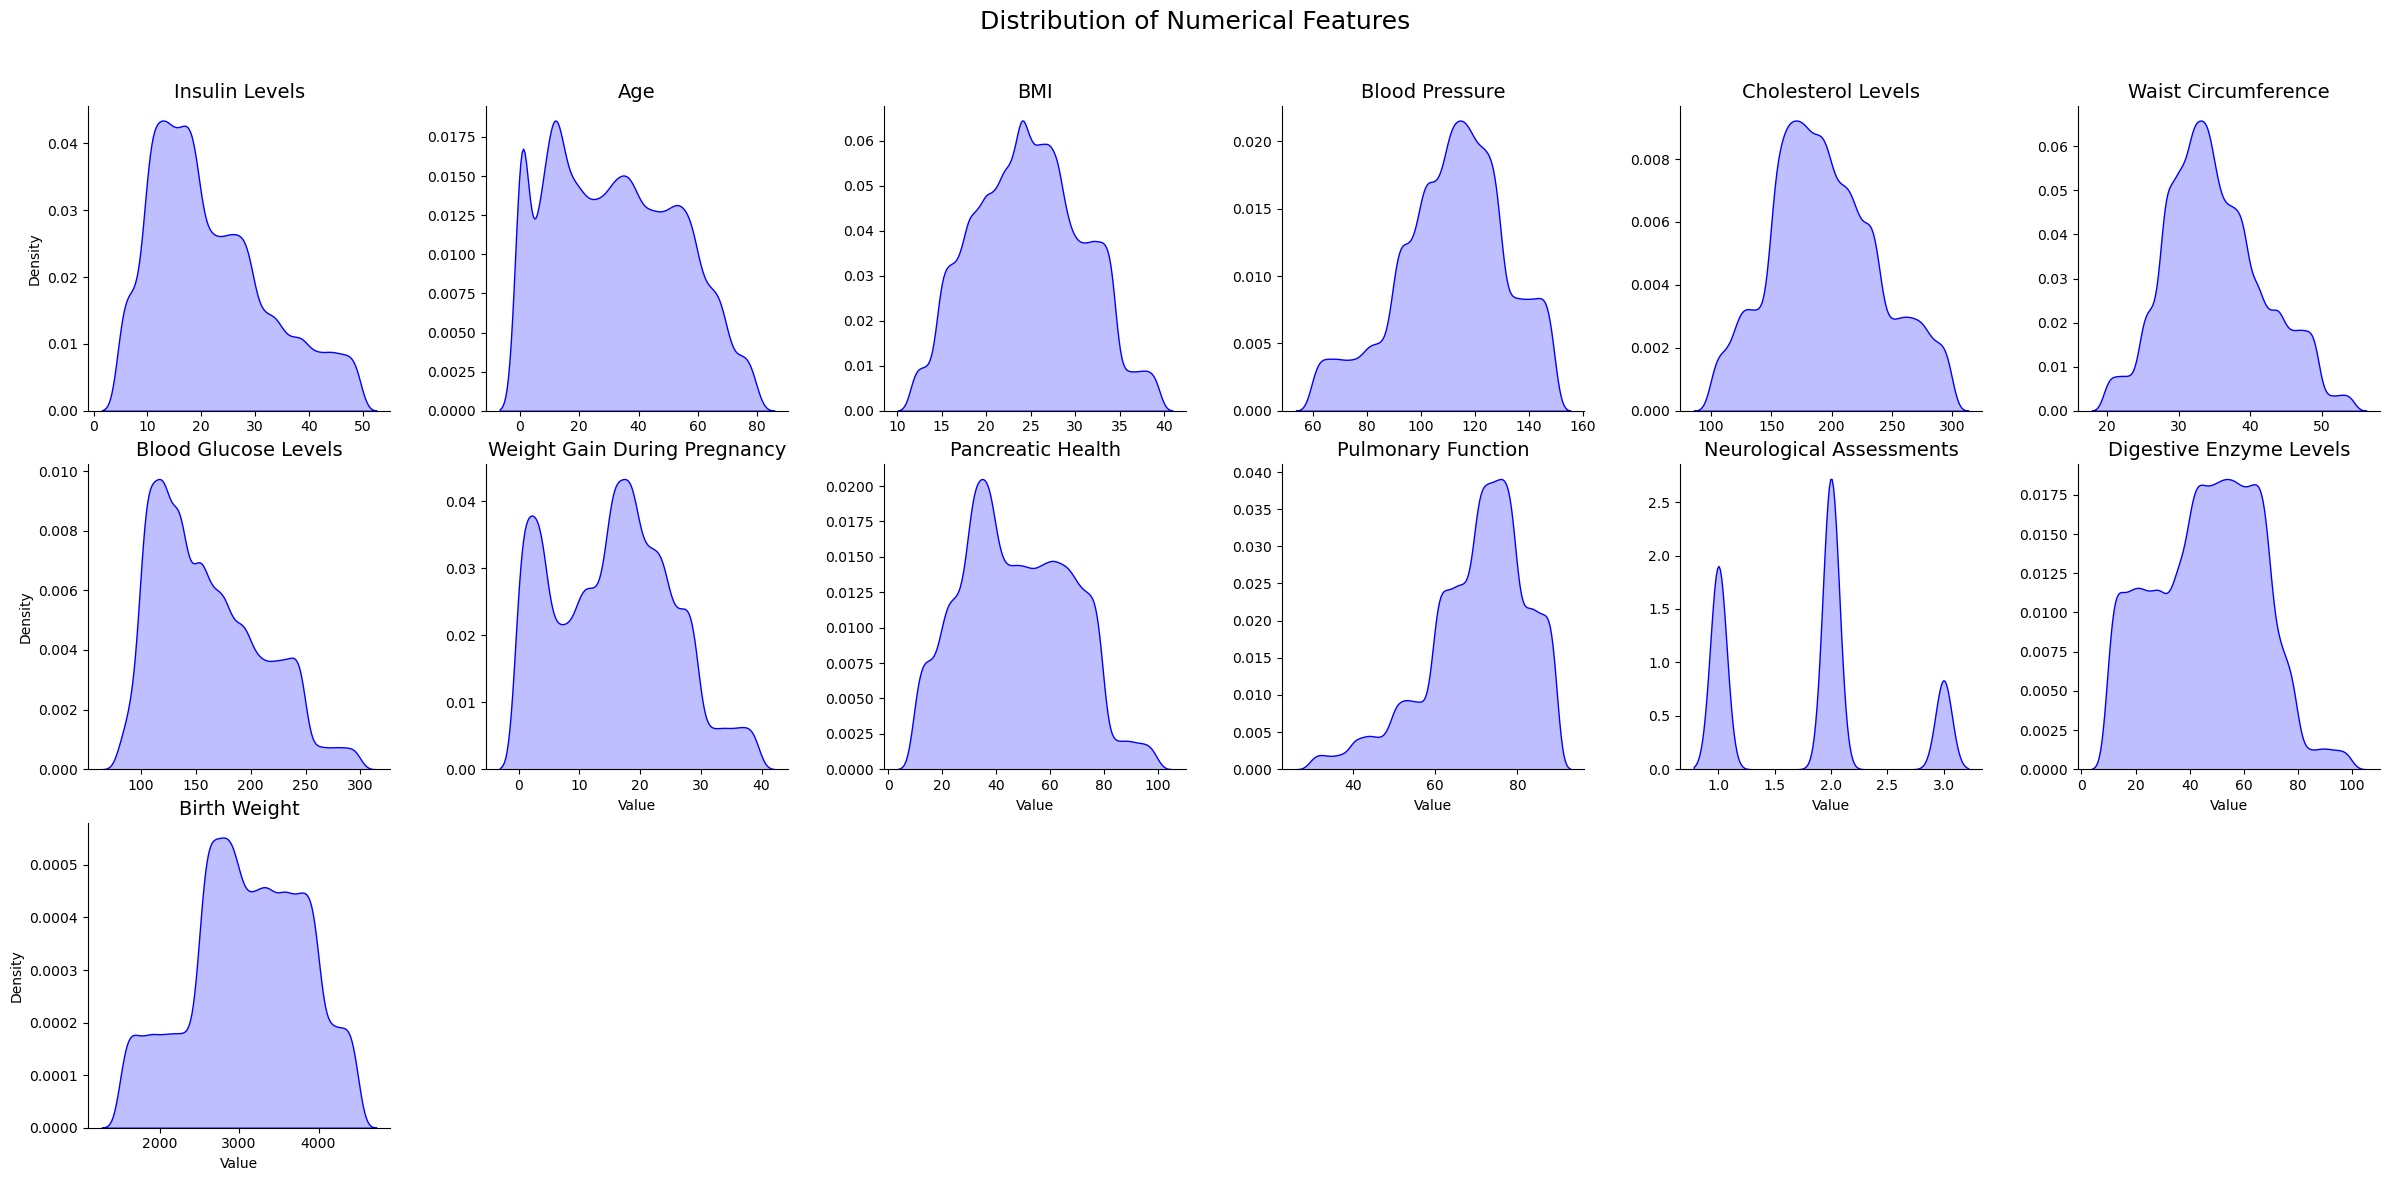

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical columns
numerical_columns = diabetes_stats.select_dtypes(include=['int64', 'float64']).columns

# Reshape data for FacetGrid (melt the DataFrame)
diabetes_melted = diabetes_stats.melt(id_vars=["Target"], value_vars=numerical_columns, var_name="Feature", value_name="Value")

# Set up the FacetGrid for each numerical feature
g = sns.FacetGrid(diabetes_melted, col="Feature", col_wrap=6, height=4, sharex=False, sharey=False)

# Create KDE plots (one smooth density line per numerical feature)
g.map_dataframe(sns.kdeplot, x="Value", fill=True, color="blue")

# Increase text size and formatting
g.set_axis_labels("Value", "Density")
g.set_titles(col_template="{col_name}", size=14)
g.fig.suptitle("Distribution of Numerical Features", fontsize=18)
plt.subplots_adjust(top=0.9)  # Adjust title position
plt.show()


## Classification Models
References
Time: https://docs.python.org/3/library/time.html 

Decision tree: https://scikit-learn.org/stable/modules/tree.html 

Decision tree feature importance: https://stackoverflow.com/questions/69061767/how-to-plot-feature-importance-for-decisiontreeclassifier 

Method 1: Decision Tree

In [17]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
import numpy as np
import time

# Prepare data
X = diabetes_encoded.drop(columns=["Target"])
y = diabetes_encoded["Target"]
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=95)

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 10],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10]
}

# Use GridSearchCV to tune the model
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=95), param_grid, cv=3, scoring='accuracy', n_jobs=-1)

accuracy_list = []
f1_list = []
train_times = []
test_times = []
model_metrics = {}
for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    start_train = time.time()
    grid_search.fit(X_train, y_train)
    tree_model = grid_search.best_estimator_
    end_train = time.time()

    start_test = time.time()
    y_pred = tree_model.predict(X_test)
    end_test = time.time()

    accuracy_list.append(accuracy_score(y_test, y_pred))
    f1_list.append(f1_score(y_test, y_pred, average="weighted"))
    train_times.append(end_train - start_train)
    test_times.append(end_test - start_test)

accuracy = np.mean(accuracy_list)
f1 = np.mean(f1_list)
training_time = np.mean(train_times)
testing_time = np.mean(test_times)

print("Tuned Decision Tree")
print(f"Accuracy     : {accuracy:.2f}")
print(f"F1 Score     : {f1:.2f}")
print(f"Training Time: {training_time:.4f} seconds")
print(f"Testing Time : {testing_time:.4f} seconds")

model_metrics["Baseline: Decision Tree"] = {
    "accuracy": round(accuracy, 2),
    "f1": round(f1, 2),
    "train_time": round(training_time, 4),
    "test_time": round(testing_time, 4)
}


Tuned Decision Tree
Accuracy     : 0.87
F1 Score     : 0.87
Training Time: 2.3426 seconds
Testing Time : 0.0061 seconds


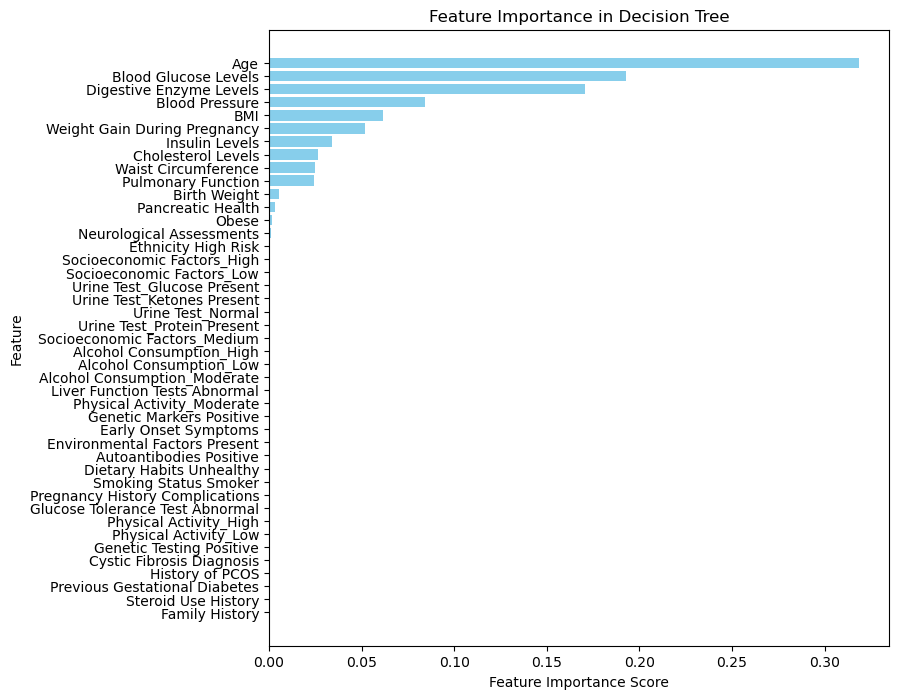

In [18]:
feature_importance = tree_model.feature_importances_
sorted_indices = np.argsort(feature_importance)[::-1]

# Define the feature names
feature_names = X.columns
sorted_features = feature_names[sorted_indices]

# Plot feature importance
plt.figure(figsize=(8, 8))
plt.barh(sorted_features, feature_importance[sorted_indices], color="skyblue")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Decision Tree")
plt.gca().invert_yaxis()
plt.show()


### Logistic Regression

Logistic regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html 

Logistic r egression feature importance: https://www.geeksforgeeks.org/understanding-feature-importance-in-logistic-regression-models/ 

In [19]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import time
import numpy as np

X = diabetes_encoded.drop(columns=["Target"])
y = diabetes_encoded["Target"]
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=95)

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2']
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Cross-validated training
accuracy_list, f1_list, train_times, test_times = [], [], [], []

for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    start_train = time.time()
    grid_search.fit(X_train, y_train)
    losistic = grid_search.best_estimator_
    end_train = time.time()

    start_test = time.time()
    y_pred = losistic.predict(X_test)
    end_test = time.time()

    accuracy_list.append(accuracy_score(y_test, y_pred))
    f1_list.append(f1_score(y_test, y_pred, average="weighted"))
    train_times.append(end_train - start_train)
    test_times.append(end_test - start_test)

accuracy = np.mean(accuracy_list)
f1 = np.mean(f1_list)
print("Tuned Logistic Regression")
print(f"Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f}")

model_metrics["Baseline: Logistic Regression"] = {
    "accuracy": round(accuracy, 2),
    "f1": round(f1, 2),
    "train_time": round(np.mean(train_times), 4),
    "test_time": round(np.mean(test_times), 4)
}


/opt/tljh/user/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/tljh/user/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Tuned Logistic Regression
Accuracy: 0.71, F1 Score: 0.71


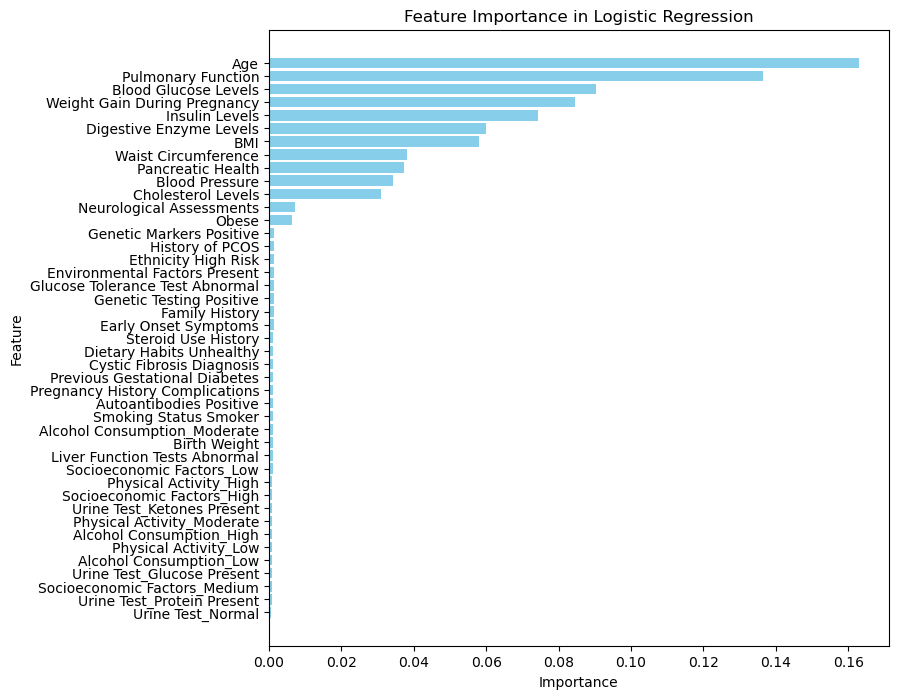

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance (coefficients)
feature_importance = np.abs(losistic.coef_).mean(axis=0)  # Averaging across classes for multi-class
importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importance})

# Sort by importance
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 8))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Logistic Regression")
plt.gca().invert_yaxis()
plt.show()


### K-Nearest Neighbors
KNN: https://scikit-learn.org/stable/modules/neighbors.html 

In [21]:

from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

# Prepare data
X = diabetes_encoded.drop(columns=["Target"])
y = diabetes_encoded["Target"]
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=95)

param_grid = {
    'n_neighbors': [3, 5, 7],
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
# Use the same train-test loop structure as above

# Cross-validated training
accuracy_list, f1_list, train_times, test_times = [], [], [], []

for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    start_train = time.time()
    grid_search.fit(X_train, y_train)
    knn = grid_search.best_estimator_
    end_train = time.time()

    start_test = time.time()
    y_pred = knn.predict(X_test)
    end_test = time.time()

    accuracy_list.append(accuracy_score(y_test, y_pred))
    f1_list.append(f1_score(y_test, y_pred, average="weighted"))
    train_times.append(end_train - start_train)
    test_times.append(end_test - start_test)

accuracy = np.mean(accuracy_list)
f1 = np.mean(f1_list)
print("KNN")
print(f"Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f}")

model_metrics["Baseline: KNN"] = {
    "accuracy": round(accuracy, 2),
    "f1": round(f1, 2),
    "train_time": round(np.mean(train_times), 4),
    "test_time": round(np.mean(test_times), 4)
}


KNN
Accuracy: 0.67, F1 Score: 0.67


### Linear Discriminant Analysis
Resource: https://scikit-learn.org/0.16/modules/generated/sklearn.lda.LDA.html

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import StratifiedKFold

# Prepare data
X = diabetes_encoded.drop(columns=["Target"])
y = diabetes_encoded["Target"]
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=95)

accuracy_list = []
f1_list = []
train_times = []
test_times = []

for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    start_train = time.time()
    lda = LDA()
    lda.fit(X_train, y_train)
    end_train = time.time()

    start_test = time.time()
    y_pred = lda.predict(X_test)
    end_test = time.time()

    accuracy_list.append(accuracy_score(y_test, y_pred))
    f1_list.append(f1_score(y_test, y_pred, average="weighted"))
    train_times.append(end_train - start_train)
    test_times.append(end_test - start_test)

accuracy = np.mean(accuracy_list)
f1 = np.mean(f1_list)
training_time = np.mean(train_times)
testing_time = np.mean(test_times)

print(f"LDA Accuracy: {accuracy:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Training Time: {training_time:.4f} seconds")
print(f"Testing Time: {testing_time:.4f} seconds")

model_metrics["LDA"] = {
    "accuracy": round(accuracy, 2),
    "f1": round(f1, 2),
    "train_time": round(training_time, 4),
    "test_time": round(testing_time, 4)
}


LDA Accuracy: 0.74
F1-Score: 0.74
Training Time: 0.3557 seconds
Testing Time: 0.0696 seconds


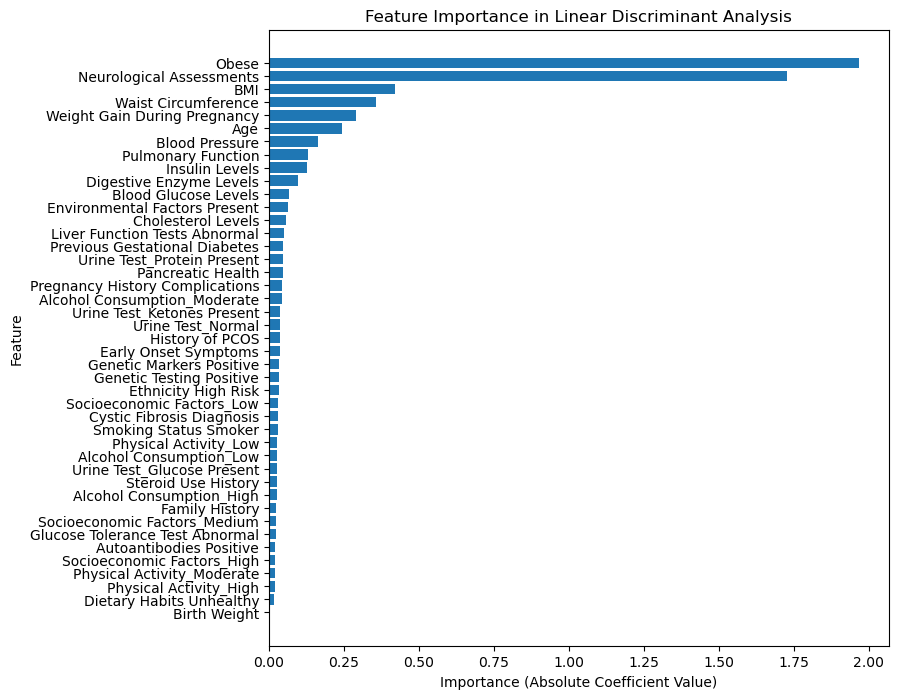

In [23]:
# Feature importance from LDA (absolute values of coefficients)
feature_importance = np.abs(lda.coef_).mean(axis=0)

importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 8))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.xlabel("Importance (Absolute Coefficient Value)")
plt.ylabel("Feature")
plt.title("Feature Importance in Linear Discriminant Analysis")
plt.gca().invert_yaxis()
plt.show()

### Support Vector Machines
Resource: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

In [24]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedKFold

# Prepare data
X = diabetes_encoded.drop(columns=["Target"])
y = diabetes_encoded["Target"]
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=95)

accuracy_list = []
f1_list = []
train_times = []
test_times = []


param_grid = {
    'C': [0.1, 1, 10],
}

grid_search = GridSearchCV(LinearSVC(), param_grid, cv=3, scoring='accuracy', n_jobs=-1)

for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    start_train = time.time()
    grid_search.fit(X_train, y_train)
    svm = grid_search.best_estimator_
    end_train = time.time()

    start_test = time.time()
    y_pred = svm.predict(X_test)
    end_test = time.time()

    accuracy_list.append(accuracy_score(y_test, y_pred))
    f1_list.append(f1_score(y_test, y_pred, average="weighted"))
    train_times.append(end_train - start_train)
    test_times.append(end_test - start_test)

accuracy = np.mean(accuracy_list)
f1 = np.mean(f1_list)
training_time = np.mean(train_times)
testing_time = np.mean(test_times)

print(f"SVM Accuracy: {accuracy:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Training Time: {training_time:.4f} seconds")
print(f"Testing Time: {testing_time:.4f} seconds")

model_metrics["SVM"] = {
    "accuracy": round(accuracy, 2),
    "f1": round(f1, 2),
    "train_time": round(training_time, 4),
    "test_time": round(testing_time, 4)
}


/opt/tljh/user/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/tljh/user/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/tljh/user/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/tljh/user/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/tljh/user/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/tljh/user/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number 

SVM Accuracy: 0.42
F1-Score: 0.39
Training Time: 231.9468 seconds
Testing Time: 0.0254 seconds


/opt/tljh/user/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


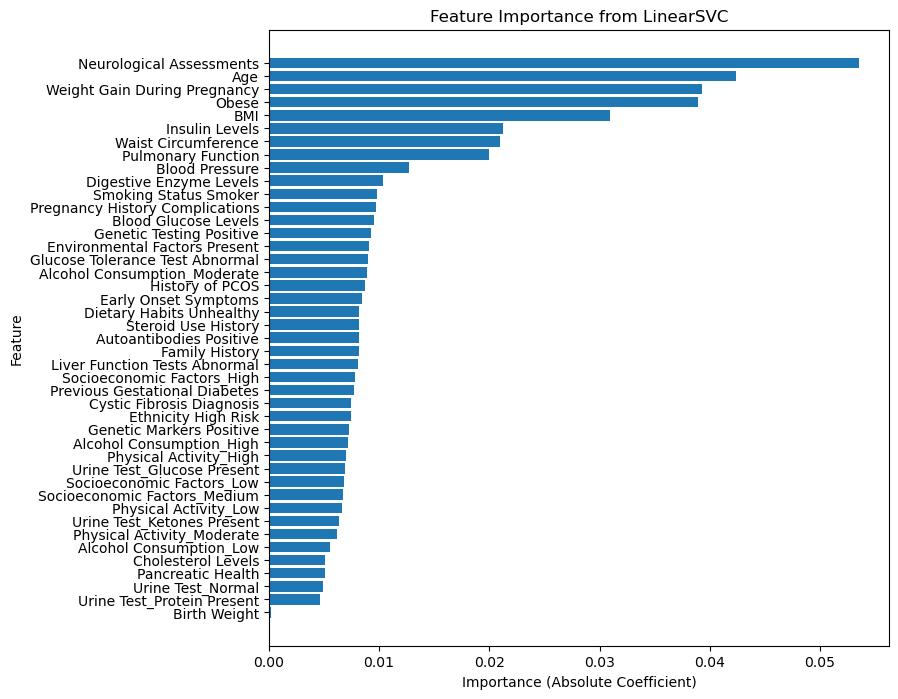

In [25]:
# Feature importance from SVM (absolute values of coefficients)
coef_matrix = svm.coef_
feature_importance = np.abs(coef_matrix).mean(axis=0)

# Sorted the dataframe
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)


# Plot
plt.figure(figsize=(8,8))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.xlabel("Importance (Absolute Coefficient)")
plt.ylabel("Feature")
plt.title("Feature Importance from LinearSVC")
plt.gca().invert_yaxis()
plt.show()


### Random Forest
Resource: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

# Prepare data
X = diabetes_encoded.drop(columns=["Target"])
y = diabetes_encoded["Target"]
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=95)

accuracy_list = []
f1_list = []
train_times = []
test_times = []

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=95), param_grid, cv=3, scoring='accuracy', n_jobs=-1)


for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    start_train = time.time()
    grid_search.fit(X_train, y_train)
    rf = grid_search.best_estimator_
    end_train = time.time()

    start_test = time.time()
    y_pred = rf.predict(X_test)
    end_test = time.time()

    accuracy_list.append(accuracy_score(y_test, y_pred))
    f1_list.append(f1_score(y_test, y_pred, average="weighted"))
    train_times.append(end_train - start_train)
    test_times.append(end_test - start_test)

accuracy = np.mean(accuracy_list)
f1 = np.mean(f1_list)
training_time = np.mean(train_times)
testing_time = np.mean(test_times)

print(f"Random Forest Accuracy: {accuracy:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Training Time: {training_time:.4f} seconds")
print(f"Testing Time: {testing_time:.4f} seconds")

model_metrics["Random Forest"] = {
    "accuracy": round(accuracy, 2),
    "f1": round(f1, 2),
    "train_time": round(training_time, 4),
    "test_time": round(testing_time, 4)
}


Random Forest Accuracy: 0.90
F1-Score: 0.90
Training Time: 35.7487 seconds
Testing Time: 0.7728 seconds


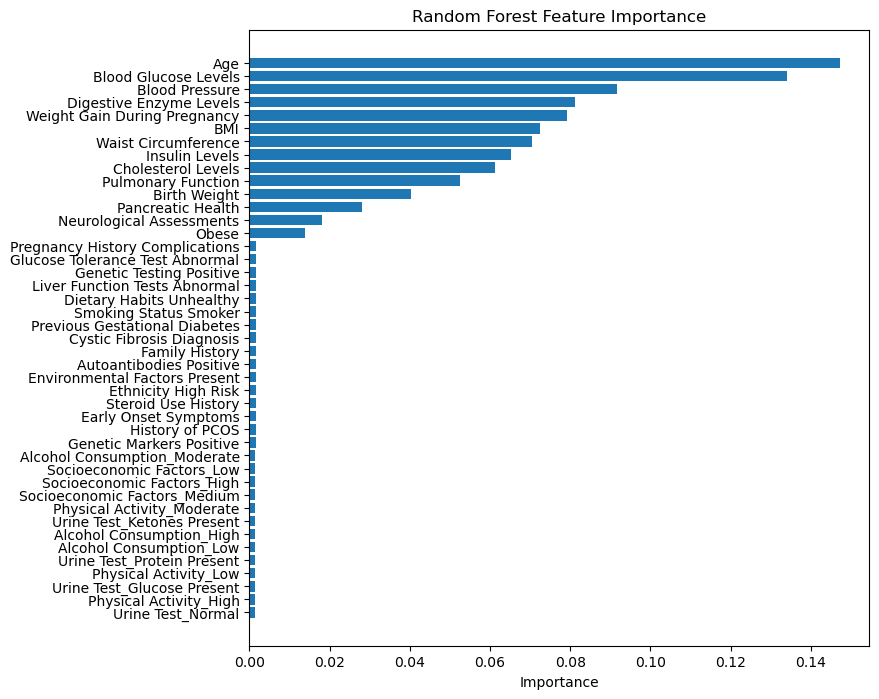

In [27]:
# Feature importance
importances = rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(8, 8))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.xlabel("Importance")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.show()


### XGBoost
Reference: https://xgboost.readthedocs.io/en/release_1.3.0/python/python_api.html

In [28]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold

# Prepare data
X = diabetes_encoded.drop(columns=["Target"])
le = LabelEncoder()
y = pd.Series(le.fit_transform(diabetes_encoded["Target"]), index=diabetes_encoded.index)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=95)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1]
}

grid_search = GridSearchCV(XGBClassifier(eval_metric='mlogloss', random_state=95), param_grid, cv=3, scoring='accuracy', n_jobs=-1)

accuracy_list = []
f1_list = []
train_times = []
test_times = []

for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    start_train = time.time()
    grid_search.fit(X_train, y_train)
    xgb = grid_search.best_estimator_
    end_train = time.time()

    start_test = time.time()
    y_pred = xgb.predict(X_test)
    end_test = time.time()

    accuracy_list.append(accuracy_score(y_test, y_pred))
    f1_list.append(f1_score(y_test, y_pred, average="weighted"))
    train_times.append(end_train - start_train)
    test_times.append(end_test - start_test)

accuracy = np.mean(accuracy_list)
f1 = np.mean(f1_list)
training_time = np.mean(train_times)
testing_time = np.mean(test_times)

print(f"XGBoost Accuracy: {accuracy:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Training Time: {training_time:.4f} seconds")
print(f"Testing Time: {testing_time:.4f} seconds")

model_metrics["XGBoost"] = {
    "accuracy": round(accuracy, 2),
    "f1": round(f1, 2),
    "train_time": round(training_time, 4),
    "test_time": round(testing_time, 4)
}


XGBoost Accuracy: 0.91
F1-Score: 0.91
Training Time: 326.6919 seconds
Testing Time: 1.1692 seconds


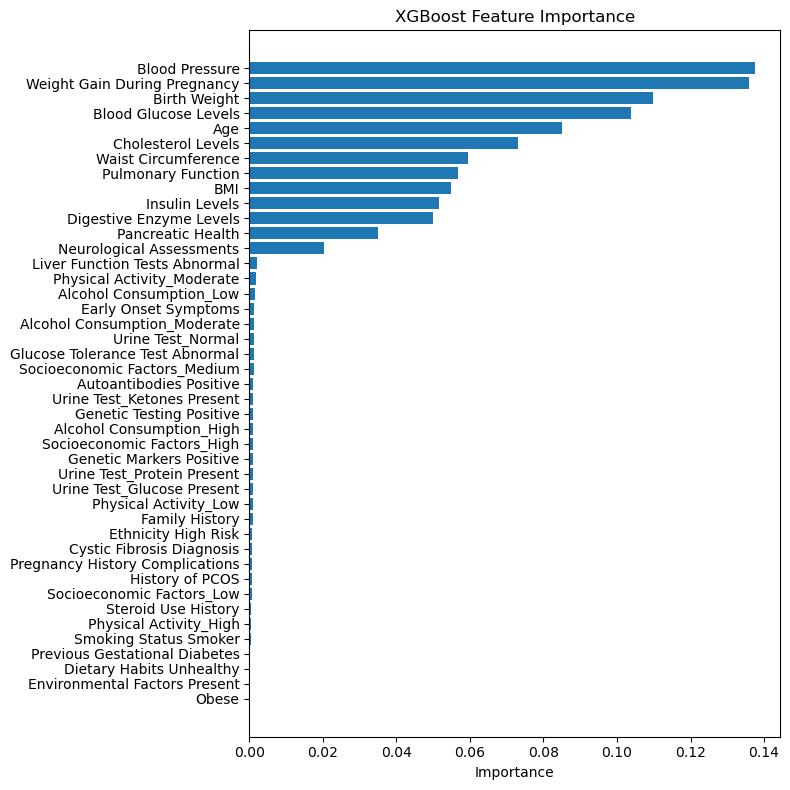

In [29]:
from xgboost import plot_importance

# Use feature_importances_ from the trained XGB model
importances = xgb.feature_importances_
feature_names = X.columns

# Create DataFrame and sort
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot in consistent style
plt.figure(figsize=(8, 8))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.xlabel("Importance")
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



### Ensemble Voting
References:

Model Approach: https://www.worldscientific.com/doi/abs/10.1142/S0218001411008683

Sci-kit Learn Implementation: https://scikit-learn.org/stable/modules/ensemble.html#voting-classifier

In [31]:
from sklearn.model_selection import StratifiedKFold
from scipy.stats import mode
import numpy as np
import time

X = diabetes_encoded.drop(columns=["Target"])
y = diabetes_encoded["Target"]
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=95)

accuracy_list = []
f1_list = []
test_times = []

for train_idx, test_idx in skf.split(X, y_encoded):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]

    # Train all base models on training fold
    lda.fit(X_train, y_train)
    svm.fit(X_train, y_train)
    tree_model.fit(X_train, y_train)
    knn.fit(X_train, y_train)
    losistic.fit(X_train, y_train)
    rf.fit(X_train, y_train)
    
    # Predict with all models
    start_test = time.time()
    preds = np.array([
        lda.predict(X_test),
        svm.predict(X_test),
        tree_model.predict(X_test),
        knn.predict(X_test),
        losistic.predict(X_test),
        rf.predict(X_test),
    ])
    y_pred_ensemble = mode(preds, axis=0).mode.squeeze()
    end_test = time.time()

    # Evaluate predictions
    acc = accuracy_score(y_test, y_pred_ensemble)
    f1 = f1_score(y_test, y_pred_ensemble, average="weighted")

    accuracy_list.append(acc)
    f1_list.append(f1)
    test_times.append(end_test - start_test)

# Final average metrics
accuracy = np.mean(accuracy_list)
f1 = np.mean(f1_list)
testing_time = np.mean(test_times)

print("Final Ensemble (Hard Voting with Stratified K-Fold)")
print(f"Accuracy     : {accuracy:.2f}")
print(f"F1 Score     : {f1:.2f}")
print(f"Testing Time : {testing_time:.4f} seconds")

model_metrics["Custom: Ensemble Voting"] = {
    "accuracy": round(accuracy, 2),
    "f1": round(f1, 2),
    "train_time": round(model_metrics["LDA"]["train_time"] + model_metrics["SVM"]["train_time"] + 
      model_metrics["Baseline: Decision Tree"]["train_time"] + model_metrics["Baseline: Logistic Regression"]["train_time"]
      + model_metrics["Baseline: KNN"]["train_time"] + model_metrics["Random Forest"]["train_time"], 4),
    "test_time": round(testing_time, 4)
}


/opt/tljh/user/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/tljh/user/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/tljh/user/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/tljh/user/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STO

Final Ensemble (Hard Voting with Stratified K-Fold)
Accuracy     : 0.83
F1 Score     : 0.83
Testing Time : 39.6916 seconds


### Stacking Model
References:

Stacking Model: https://www.sciencedirect.com/science/article/pii/S0893608005800231?via%3Dihub

Sci-kit Learn Implementation: https://scikit-learn.org/stable/modules/ensemble.html#stacking

In [32]:
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=95)

accuracy_list = []
f1_list = []
train_times = []
test_times = []

X = diabetes_encoded.drop(columns=["Target"])
le = LabelEncoder()
y = pd.Series(le.fit_transform(diabetes_encoded["Target"]), index=diabetes_encoded.index)

for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    stacking_model = StackingClassifier(
        estimators=[
            ('lda', lda),
            ('svm', svm),
            ('tree', tree_model),
            ('logreg', losistic),
            ('rf', rf)
        ],
        final_estimator=make_pipeline(
            StandardScaler(),
            LogisticRegression(solver='saga', max_iter=2000)
        ),
        cv=5,
        n_jobs=-1
    )

    start_train = time.time()
    stacking_model.fit(X_train, y_train)
    end_train = time.time()

    start_test = time.time()
    y_pred = stacking_model.predict(X_test)
    end_test = time.time()

    accuracy_list.append(accuracy_score(y_test, y_pred))
    f1_list.append(f1_score(y_test, y_pred, average='weighted'))
    train_times.append(end_train - start_train)
    test_times.append(end_test - start_test)

accuracy = np.mean(accuracy_list)
f1 = np.mean(f1_list)
training_time = np.mean(train_times)
testing_time = np.mean(test_times)

print("Stacking Ensemble")
print(f"Accuracy     : {accuracy:.2f}")
print(f"F1 Score     : {f1:.2f}")
print(f"Training Time: {training_time:.4f} seconds")
print(f"Testing Time : {testing_time:.4f} seconds")

model_metrics["Custom: Stacking"] = {
    "accuracy": round(accuracy, 2),
    "f1": round(f1, 2),
    "train_time": round(training_time, 4),
    "test_time": round(testing_time, 4)
}


/opt/tljh/user/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/tljh/user/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/tljh/user/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

Stacking Ensemble
Accuracy     : 0.89
F1 Score     : 0.89
Training Time: 365.1910 seconds
Testing Time : 0.8596 seconds


### Multilayer Perceptron using TensorFlow Keras
Tensorflow Keras: https://www.tensorflow.org/guide/keras

Dropout Reference: https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, LeakyReLU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=95)

accuracy_list = []
f1_list = []
train_times = []
test_times = []

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Prepare data
X = diabetes_encoded.drop(columns=["Target"])
y = diabetes_encoded["Target"]
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_classes = len(label_encoder.classes_)

for train_idx, test_idx in skf.split(X_scaled, y_encoded):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train_raw, y_test_raw = y_encoded[train_idx], y_encoded[test_idx]
    
    y_train = to_categorical(y_train_raw, num_classes=num_classes)
    y_test = to_categorical(y_test_raw, num_classes=num_classes)

    model = Sequential([
        Input(shape=(X.shape[1],)),
        Dense(256), BatchNormalization(), LeakyReLU(), Dropout(0.4),
        Dense(128), BatchNormalization(), LeakyReLU(), Dropout(0.4),
        Dense(64), BatchNormalization(), LeakyReLU(),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    start_train = time.time()
    history = model.fit(X_train, y_train,
              validation_split=0.2,
              epochs=100,
              batch_size=32,
              callbacks=[early_stop],
              verbose=0)
    end_train = time.time()

    start_test = time.time()
    y_pred_probs = model.predict(X_test, verbose=0)
    y_pred = tf.argmax(y_pred_probs, axis=1).numpy()
    end_test = time.time()

    accuracy_list.append(accuracy_score(y_test_raw, y_pred))
    f1_list.append(f1_score(y_test_raw, y_pred, average="weighted"))
    train_times.append(end_train - start_train)
    test_times.append(end_test - start_test)

# --- Average results ---
accuracy = np.mean(accuracy_list)
f1 = np.mean(f1_list)
training_time = np.mean(train_times)
testing_time = np.mean(test_times)

print(f"Accuracy: {accuracy:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Training Time: {training_time:.4f} seconds")
print(f"Testing Time: {testing_time:.4f} seconds")

model_metrics["Multilayer Perceptron"] = {
    "accuracy": round(accuracy, 2),
    "f1": round(f1, 2),
    "train_time": round(training_time, 4),
    "test_time": round(testing_time, 4)
}


2025-04-23 01:12:20.613835: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-23 01:12:20.615784: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-23 01:12:20.620870: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-23 01:12:20.634869: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-23 01:12:20.658960: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

Accuracy: 0.83
F1-Score: 0.83
Training Time: 225.7272 seconds
Testing Time: 1.0874 seconds


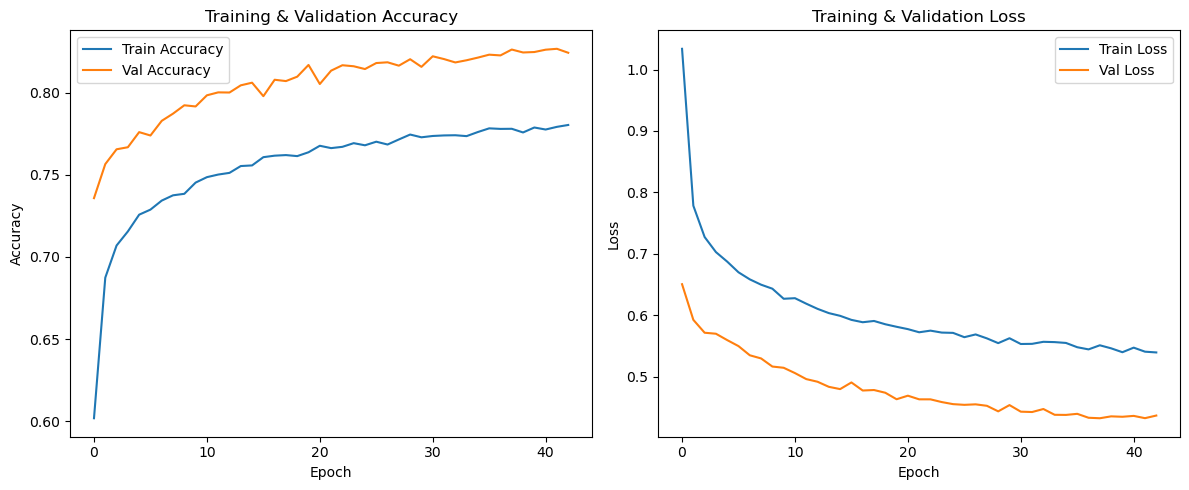

In [34]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy")
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()

plt.tight_layout()
plt.show()


In [35]:
#Save the trained models
import joblib
# Resource: https://joblib.readthedocs.io/en/stable/

# Save base models used in custom voting
joblib.dump(tree_model, "tree_model.pkl")
joblib.dump(losistic, "logistic_model.pkl")
joblib.dump(knn, "knn_model.pkl")
joblib.dump(lda, "lda_model.pkl")
joblib.dump(svm, "svm_model.pkl")
joblib.dump(rf, "rf_model.pkl")

# Save other models (if needed)
joblib.dump(xgb, "xgb_model.pkl")
joblib.dump(stacking_model, "stacking_model.pkl")
model.save("mlp_model.h5")
joblib.dump(scaler, "scaler.pkl")
# Save label encoder
joblib.dump(label_encoder, "label_encoder.pkl")


# Save the model results as a JSON file
import pickle 
with open('model_metrics.pkl', 'wb') as f:
    pickle.dump(model_metrics, f)
    
#save the dataframe
diabetes_raw = pd.read_csv('diabetes_dataset.csv')
diabetes_raw.to_csv("results.csv", index=False)
joblib.dump(X.columns.tolist(), "training_columns.pkl")



['training_columns.pkl']

In [36]:
print(diabetes_raw["Genetic Markers"])

0        Positive
1        Positive
2        Positive
3        Negative
4        Negative
           ...   
69995    Negative
69996    Positive
69997    Positive
69998    Positive
69999    Positive
Name: Genetic Markers, Length: 70000, dtype: object


In [37]:
print(model_metrics)

{'Baseline: Decision Tree': {'accuracy': 0.87, 'f1': 0.87, 'train_time': 2.3426, 'test_time': 0.0061}, 'Baseline: Logistic Regression': {'accuracy': 0.71, 'f1': 0.71, 'train_time': 91.4823, 'test_time': 0.0359}, 'Baseline: KNN': {'accuracy': 0.67, 'f1': 0.67, 'train_time': 152.624, 'test_time': 32.9899}, 'LDA': {'accuracy': 0.74, 'f1': 0.74, 'train_time': 0.3557, 'test_time': 0.0696}, 'SVM': {'accuracy': 0.42, 'f1': 0.39, 'train_time': 231.9468, 'test_time': 0.0254}, 'Random Forest': {'accuracy': 0.9, 'f1': 0.9, 'train_time': 35.7487, 'test_time': 0.7728}, 'XGBoost': {'accuracy': 0.91, 'f1': 0.91, 'train_time': 326.6919, 'test_time': 1.1692}, 'Custom: Ensemble Voting': {'accuracy': 0.83, 'f1': 0.83, 'train_time': 514.5001, 'test_time': 39.6916}, 'Custom: Stacking': {'accuracy': 0.89, 'f1': 0.89, 'train_time': 365.191, 'test_time': 0.8596}, 'Multilayer Perceptron': {'accuracy': 0.83, 'f1': 0.83, 'train_time': 225.7272, 'test_time': 1.0874}}


# 